In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation
---

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).

### Create a Series

Create a **Series** by passing a list of values, letting pandas create a default integer index:

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [12]:
type(s.values), type(s)

(numpy.ndarray, pandas.core.series.Series)

### Create a DataFrame

+ From a **numpy array**, with a datetime **index** and labeled **columns**:

In [7]:
dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
type(dates.values), type(dates)

(numpy.ndarray, pandas.core.indexes.datetimes.DatetimeIndex)

In [9]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,1.166387,0.696334,1.136022,0.763605
2013-01-02,1.515749,-0.142755,-0.432827,0.553764
2013-01-03,0.509061,-1.071243,1.783740,-0.290010
2013-01-04,-0.913369,-0.305965,0.073172,-0.097505
2013-01-05,-0.682212,-1.204597,-0.884846,0.031236
2013-01-06,1.499389,-2.119888,1.210498,0.127535


In [10]:
type(df.values), type(df)

(numpy.ndarray, pandas.core.frame.DataFrame)

**참고: list of a string**

In [ ]:
a=list('abcd') 
b=list(['a','b','c','d'])
print(a==b)
print(a,b)


True
['a', 'b', 'c', 'd'] ['a', 'b', 'c', 'd']


* From a **dict** of objects that can be converted to series-like.

In [ ]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

**참고: 약간 복잡한 list comprehension**

In [ ]:
P = [ [3*(i-1)+j]*3 for i in range(1,4) for j in range(1,4) ]
P

[[1, 1, 1],
 [2, 2, 2],
 [3, 3, 3],
 [4, 4, 4],
 [5, 5, 5],
 [6, 6, 6],
 [7, 7, 7],
 [8, 8, 8],
 [9, 9, 9]]

In [ ]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific dtypes

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

## Viewing Data
---
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics "Essential Basic Functionality")

See the top & bottom rows of the frame.

In [ ]:
df.head()


,A,B,C,D
2000-01-01,0.483598,0.426364,-0.117650,-0.306856
2000-01-02,2.079464,0.207178,-1.478635,-2.985918
2000-01-03,2.545530,-1.393445,0.299719,-2.241067
2000-01-04,2.270839,-0.593655,0.675529,-2.311171
2000-01-05,2.437582,-1.811711,0.227139,-3.210259


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.635065,0.983312,-1.862900,0.511334
2013-01-05,1.085677,-0.501334,-0.050755,-0.925486
2013-01-06,-0.651435,0.091569,-0.882793,0.478696


In [ ]:
len(df), df.shape



(6, (6, 4))

Display the index, colums, and the underlying numpy data.

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
c=df.values  # convert to numpy array(ndarray)
print(type(c))
c

<class 'numpy.ndarray'>


array([[ 1.50777825, -0.98850974, -1.65509956, -1.8907108 ],
       [ 0.0367761 ,  0.57379321,  1.49657932, -0.13446649],
       [-1.07853121, -1.09482512, -0.92130447, -0.5731196 ],
       [-1.63506518,  0.98331157, -1.86290045,  0.51133396],
       [ 1.08567666, -0.5013336 , -0.05075476, -0.92548628],
       [-0.65143542,  0.0915692 , -0.88279295,  0.47869629]])

Describe shows a quick statistic summary of your data.

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.122467,-0.155999,-0.646045,-0.422292
std,1.234867,0.846834,1.230931,0.916350
min,-1.635065,-1.094825,-1.862900,-1.890711
25%,-0.971757,-0.866716,-1.471651,-0.837395
50%,-0.307330,-0.204882,-0.902049,-0.353793
75%,0.823452,0.453237,-0.258764,0.325406
max,1.507778,0.983312,1.496579,0.511334


Transposing your data.

In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.507778,0.036776,-1.078531,-1.635065,1.085677,-0.651435
B,-0.988510,0.573793,-1.094825,0.983312,-0.501334,0.091569
C,-1.655100,1.496579,-0.921304,-1.862900,-0.050755,-0.882793
D,-1.890711,-0.134466,-0.573120,0.511334,-0.925486,0.478696


Sorting by an axis.

In [ ]:
df.sort_index(axis='columns',ascending = False) # Axis to be sorted. => axis{0 or ‘index’, 1 or ‘columns’}, default 0 

,D,C,B,A
2000-01-01,-0.306856,-0.117650,0.426364,0.483598
2000-01-02,-2.985918,-1.478635,0.207178,2.079464
2000-01-03,-2.241067,0.299719,-1.393445,2.545530
2000-01-04,-2.311171,0.675529,-0.593655,2.270839
2000-01-05,-3.210259,0.227139,-1.811711,2.437582
...,...,...,...,...
2002-09-22,-64.392089,19.130945,-19.808672,-16.058726
2002-09-23,-66.089537,20.228742,-18.630670,-14.328951
2002-09-24,-64.984251,21.426182,-17.559811,-14.744091
2002-09-25,-65.091796,20.702291,-16.058676,-13.787952


In [ ]:
df.sort_index(axis='index', ascending = False)

,A,B,C,D
2013-01-06,-0.651435,0.091569,-0.882793,0.478696
2013-01-05,1.085677,-0.501334,-0.050755,-0.925486
2013-01-04,-1.635065,0.983312,-1.862900,0.511334
2013-01-03,-1.078531,-1.094825,-0.921304,-0.573120
2013-01-02,0.036776,0.573793,1.496579,-0.134466
2013-01-01,1.507778,-0.988510,-1.655100,-1.890711


<br><br>

## Selection
---

**Note:** While standard Python/Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at; .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing "Indexing and Selecting Data") and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced "MultiIndex / Advanced Indexing").

### Getting

Selecting a single column, which yields a *Series*.

In [ ]:
df['A']

2013-01-01    1.507778
2013-01-02    0.036776
2013-01-03   -1.078531
2013-01-04   -1.635065
2013-01-05    1.085677
2013-01-06   -0.651435
Freq: D, Name: A, dtype: float64

In [ ]:
df.A

2013-01-01    1.507778
2013-01-02    0.036776
2013-01-03   -1.078531
2013-01-04   -1.635065
2013-01-05    1.085677
2013-01-06   -0.651435
Freq: D, Name: A, dtype: float64

In [ ]:
type(df.A)

pandas.core.series.Series

# **Selecting via `[]`, which slices the rows.**

In [ ]:
df[0 : 3]

,A,B,C,D
2013-01-01,1.507778,-0.988510,-1.655100,-1.890711
2013-01-02,0.036776,0.573793,1.496579,-0.134466
2013-01-03,-1.078531,-1.094825,-0.921304,-0.573120


In [ ]:
df['20130102' : '20130104']

,A,B,C,D
2013-01-02,0.036776,0.573793,1.496579,-0.134466
2013-01-03,-1.078531,-1.094825,-0.921304,-0.573120
2013-01-04,-1.635065,0.983312,-1.862900,0.511334


### Selection by Label

See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label "Selection By Label").

For getting a cross section using a Label.

In [ ]:
x=df.loc[dates[0]]
x

A    1.507778
B   -0.988510
C   -1.655100
D   -1.890711
Name: 2013-01-01 00:00:00, dtype: float64

In [ ]:
type(x)

pandas.core.series.Series

Selecting on a multi-axis by label.

In [ ]:
df.loc[:, ['A', 'B','D']]

,A,B,D
2013-01-01,1.507778,-0.988510,-1.890711
2013-01-02,0.036776,0.573793,-0.134466
2013-01-03,-1.078531,-1.094825,-0.573120
2013-01-04,-1.635065,0.983312,0.511334
2013-01-05,1.085677,-0.501334,-0.925486
2013-01-06,-0.651435,0.091569,0.478696


Showing label slicing, both endpoints are _included_.

In [ ]:
df.loc['20130102' : '20130104', ['A', 'B','D']]

,A,B,D
2013-01-02,0.036776,0.573793,-0.134466
2013-01-03,-1.078531,-1.094825,-0.573120
2013-01-04,-1.635065,0.983312,0.511334


Reduction in the dimensions of the returned object.

In [ ]:
df.loc['20130102', ['A', 'B']]

A    0.036776
B    0.573793
Name: 2013-01-02 00:00:00, dtype: float64

<img src='https://bham-carpentries.github.io/2018-12-17-bham_python-novice-inflammation/fig/python-zero-index.png'>

For getting a scalar value

In [ ]:
df.loc[dates[0], 'A']

1.5077782509561177

For getting fast access to a scalar (equiv to the prior method)

In [ ]:
df.at[dates[0], 'A']

1.5077782509561177

### Selection by Position
See more in [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer "Selection by Position")

Select via the position of the passed integers

In [ ]:
df.iloc[3]

A   -1.635065
B    0.983312
C   -1.862900
D    0.511334
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to nump/python

In [ ]:
df.iloc[3 : 5, 0 : 2]

,A,B
2013-01-04,-1.635065,0.983312
2013-01-05,1.085677,-0.501334


By lists of integer position locations, similar to the numpy/python style.

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.036776,1.496579
2013-01-03,-1.078531,-0.921304
2013-01-05,1.085677,-0.050755


For slicing rows explicitly

In [ ]:
df.iloc[1 : 3, :]

,A,B,C,D
2013-01-02,0.036776,0.573793,1.496579,-0.134466
2013-01-03,-1.078531,-1.094825,-0.921304,-0.573120


For slicing columns explicitly

In [ ]:
df.iloc[:, 1 : 3]

,B,C
2013-01-01,-0.988510,-1.655100
2013-01-02,0.573793,1.496579
2013-01-03,-1.094825,-0.921304
2013-01-04,0.983312,-1.862900
2013-01-05,-0.501334,-0.050755
2013-01-06,0.091569,-0.882793


For getting a value explicitly

In [ ]:
df.iloc[1, 1]

0.5737932095390793

For getting fast access to a scalar (equiv to the prior method)

In [ ]:
df.iat[1, 1]

0.5737932095390793

### Boolean Indexing

Using a single column's values to select data.

Selecting values from a DataFrame where a boolean condition is met.

In [ ]:
df[df > 0]

,A,B,C,D
2000-01-01,0.483598,0.426364,NaN,NaN
2000-01-02,2.079464,0.207178,NaN,NaN
2000-01-03,2.545530,NaN,0.299719,NaN
2000-01-04,2.270839,NaN,0.675529,NaN
2000-01-05,2.437582,NaN,0.227139,NaN
...,...,...,...,...
2002-09-22,NaN,NaN,19.130945,NaN
2002-09-23,NaN,NaN,20.228742,NaN
2002-09-24,NaN,NaN,21.426182,NaN
2002-09-25,NaN,NaN,20.702291,NaN


In [ ]:
df3 = df.copy()

In [ ]:
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [ ]:
df3

,A,B,C,D,E
2013-01-01,1.507778,-0.988510,-1.655100,-1.890711,one
2013-01-02,0.036776,0.573793,1.496579,-0.134466,one
2013-01-03,-1.078531,-1.094825,-0.921304,-0.573120,two
2013-01-04,-1.635065,0.983312,-1.862900,0.511334,three
2013-01-05,1.085677,-0.501334,-0.050755,-0.925486,four
2013-01-06,-0.651435,0.091569,-0.882793,0.478696,three


### Setting

Setting a new column automatically aligns the data by the indexes.

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label

In [ ]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,-0.988510,-1.655100,-1.890711
2013-01-02,0.036776,0.573793,1.496579,-0.134466
2013-01-03,-1.078531,-1.094825,-0.921304,-0.573120
2013-01-04,-1.635065,0.983312,-1.862900,0.511334
2013-01-05,1.085677,-0.501334,-0.050755,-0.925486
2013-01-06,-0.651435,0.091569,-0.882793,0.478696


Setting values by position

In [ ]:
df.iat[0, 1] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.655100,-1.890711
2013-01-02,0.036776,0.573793,1.496579,-0.134466
2013-01-03,-1.078531,-1.094825,-0.921304,-0.573120
2013-01-04,-1.635065,0.983312,-1.862900,0.511334
2013-01-05,1.085677,-0.501334,-0.050755,-0.925486
2013-01-06,-0.651435,0.091569,-0.882793,0.478696


Setting by assigning with a numpy array

In [ ]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [ ]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.655100,5
2013-01-02,0.036776,0.573793,1.496579,5
2013-01-03,-1.078531,-1.094825,-0.921304,5
2013-01-04,-1.635065,0.983312,-1.862900,5
2013-01-05,1.085677,-0.501334,-0.050755,5
2013-01-06,-0.651435,0.091569,-0.882793,5


A **`where`** operation with setting.

In [ ]:
df2 = df.copy()
df2

,A,B,C,D
2000-01-01,0.483598,0.426364,-0.117650,-0.306856
2000-01-02,2.079464,0.207178,-1.478635,-2.985918
2000-01-03,2.545530,-1.393445,0.299719,-2.241067
2000-01-04,2.270839,-0.593655,0.675529,-2.311171
2000-01-05,2.437582,-1.811711,0.227139,-3.210259
...,...,...,...,...
2002-09-22,-16.058726,-19.808672,19.130945,-64.392089
2002-09-23,-14.328951,-18.630670,20.228742,-66.089537
2002-09-24,-14.744091,-17.559811,21.426182,-64.984251
2002-09-25,-13.787952,-16.058676,20.702291,-65.091796


In [ ]:
df2[df2 > 0] = - df2

In [ ]:
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.655100,-5
2013-01-02,-0.036776,-0.573793,-1.496579,-5
2013-01-03,-1.078531,-1.094825,-0.921304,-5
2013-01-04,-1.635065,-0.983312,-1.862900,-5
2013-01-05,-1.085677,-0.501334,-0.050755,-5
2013-01-06,-0.651435,-0.091569,-0.882793,-5


## Missing Data
---

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data Section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data "Working with missing data")

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [ ]:
df1 = df.reindex(index = dates[0 : 4], columns = list(df.columns) + ['E'])

In [ ]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.655100,5,NaN
2013-01-02,0.036776,0.573793,1.496579,5,NaN
2013-01-03,-1.078531,-1.094825,-0.921304,5,NaN
2013-01-04,-1.635065,0.983312,-1.862900,5,NaN


In [ ]:
df1.loc[dates[0]: dates[1], 'E'] = 1

In [ ]:
df1 

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.655100,5,1.0
2013-01-02,0.036776,0.573793,1.496579,5,1.0
2013-01-03,-1.078531,-1.094825,-0.921304,5,NaN
2013-01-04,-1.635065,0.983312,-1.862900,5,NaN


In [ ]:
df1.dropna(how = 'any') # ‘any’ : If any NA values are present, drop that row or column.
                        # ‘all’ : If all values are NA, drop that row or column.

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.655100,5,1.0
2013-01-02,0.036776,0.573793,1.496579,5,1.0


Filling missing data

In [ ]:
df1.fillna(value = 5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.655100,5,1.0
2013-01-02,0.036776,0.573793,1.496579,5,1.0
2013-01-03,-1.078531,-1.094825,-0.921304,5,5.0
2013-01-04,-1.635065,0.983312,-1.862900,5,5.0


To get the boolean mask where values are `nan`

In [ ]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations
---
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop "Flexible binary operations")

### Stats

Operations in general _exclude_ missing data.

Performing a descriptive statistic.

 <img src= 'https://i.stack.imgur.com/FzimB.png'>  

 <img src='https://bham-carpentries.github.io/2018-12-17-bham_python-novice-inflammation/fig/python-operations-across-axes.png'>

In [ ]:
df.mean()

A   -0.373763
B    0.008753
C   -0.646045
D    5.000000
dtype: float64

In [ ]:
df.mean(0)    # same as above

A   -0.373763
B    0.008753
C   -0.646045
D    5.000000
dtype: float64

In [ ]:
df.mean(axis='index')

A   -0.373763
B    0.008753
C   -0.646045
D    5.000000
dtype: float64

Same operation on the other axis.

In [ ]:
df.mean(1)

2013-01-01    0.836225
2013-01-02    1.776787
2013-01-03    0.476335
2013-01-04    0.621336
2013-01-05    1.383397
2013-01-06    0.889335
Freq: D, dtype: float64

In [ ]:
df.mean(axis='columns')

2013-01-01    0.836225
2013-01-02    1.776787
2013-01-03    0.476335
2013-01-04    0.621336
2013-01-05    1.383397
2013-01-06    0.889335
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)

In [ ]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis = 'index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-2.078531,-2.094825,-1.921304,4.0
2013-01-04,-4.635065,-2.016688,-4.862900,2.0
2013-01-05,-3.914323,-5.501334,-5.050755,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [ ]:
df

,A,B,C,D
2013-01-01,0.073357,-2.415950,0.268023,0.226419
2013-01-02,0.241121,0.522426,-0.487546,1.114344
2013-01-03,0.550958,0.911274,2.110040,0.816214
2013-01-04,-0.634632,-0.460077,-3.029944,1.976530
2013-01-05,-0.973007,-0.184916,-0.802747,-0.283274
2013-01-06,-0.520875,0.257082,-0.174847,1.402456


### Apply

Applying functions to the data.

In [ ]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.073357,-2.415950,0.268023,0.226419
2013-01-02,0.314478,-1.893524,-0.219523,1.340763
2013-01-03,0.865436,-0.982251,1.890517,2.156977
2013-01-04,0.230804,-1.442328,-1.139427,4.133507
2013-01-05,-0.742202,-1.627244,-1.942174,3.850233
2013-01-06,-1.263078,-1.370162,-2.117021,5.252688


In [ ]:
df.apply(lambda x: x.max() - x.min())

A    1.523965
B    3.327224
C    5.139984
D    2.259804
dtype: float64

### String Methods

Series is equipped with a set of string processing methods in the _str_ attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in _str_ generally uses [regular expressions](https://docs.python.org/2/library/re.html "Regular expression operations") by default (and in some cases always uses them). See more at [Vectorizing String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods "Working with Text Data").

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [ ]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Append

Append rows to a dataframe. See the [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation "Concatenating using append").

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])

In [ ]:
df

,A,B,C,D
0,0.185249,-1.165181,1.397914,-1.567392
1,0.632491,0.077462,-0.938466,-1.554140
2,-1.151306,-0.349346,1.173865,-0.495339
3,-1.910611,0.310406,-1.180243,0.921857
4,-0.731572,0.943779,0.116439,0.811587
5,0.890983,1.083808,0.316836,-0.393110
6,0.148252,0.806476,-0.459121,-0.107080
7,-0.280047,0.013278,2.169948,0.548183


In [ ]:
s = df.iloc[3]

In [ ]:
s

A   -1.910611
B    0.310406
C   -1.180243
D    0.921857
Name: 3, dtype: float64

In [ ]:
df.append(s, ignore_index = True)

,A,B,C,D
0,0.185249,-1.165181,1.397914,-1.567392
1,0.632491,0.077462,-0.938466,-1.554140
2,-1.151306,-0.349346,1.173865,-0.495339
3,-1.910611,0.310406,-1.180243,0.921857
4,-0.731572,0.943779,0.116439,0.811587
5,0.890983,1.083808,0.316836,-0.393110
6,0.148252,0.806476,-0.459121,-0.107080
7,-0.280047,0.013278,2.169948,0.548183
8,-1.910611,0.310406,-1.180243,0.921857


## Grouping
---
By "group by" we are referring to a process involving one or more of the following steps
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

See the [Grouping Section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby "Group By: split-apply-combine")

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [ ]:
df

,A,B,C,D
0,foo,one,0.383389,-1.703295
1,bar,one,-1.206909,-0.288815
2,foo,two,0.401701,0.071401
3,bar,three,0.442368,1.338745
4,foo,two,-0.937079,0.676632
5,bar,two,0.405440,-0.442961
6,foo,one,0.896157,1.762905
7,foo,three,-0.396547,0.960413


Grouping and then applying a function **`sum`** to the resulting groups.

In [ ]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.953123,0.112718
foo,-0.122456,1.349377


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [ ]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.874120  1.368092
    three  0.133634  0.019391
    two   -1.212637 -1.274765
foo one    2.521057  1.118867
    three -0.035097  0.615538
    two   -2.608416 -0.385028

### Pivot Tables

In [ ]:
my_list = list('abc'*3)
my_set = set('abc'*3)

print('my_list = ', my_list)
print('my_set = ', my_set)

my_list =  ['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c']
my_set =  {'b', 'a', 'c'}


In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [ ]:
df

,A,B,C,D,E
0,one,A,foo,-0.788861,0.575432
1,one,B,foo,0.554089,1.487042
2,two,C,foo,-0.262430,1.246301
3,three,A,bar,0.728067,-0.680476
4,one,B,bar,0.946536,1.813064
5,one,C,bar,-1.902402,-0.758040
6,two,A,foo,1.304659,-0.202735
7,three,B,foo,0.485923,-0.489020
8,one,C,foo,-0.555983,-1.489778
9,one,A,bar,0.516368,-0.066923


We can produce pivot tables from this data very easily:

In [ ]:
pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C'])

C             bar       foo
A     B                    
one   A -1.732185 -1.419249
      B -0.355746 -0.244286
      C -0.455698 -0.373747
three A  0.427033       NaN
      B       NaN  2.429246
      C  0.283709       NaN
two   A       NaN  0.970306
      B  0.982926       NaN
      C       NaN -0.237759

## Categoricals

Since version 0.15, pandas can include categorical data in a `DataFrame`. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical "Categorical Data") and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical "Categorical API").

In [ ]:
df = pd.DataFrame({"id":[1, 2, 3, 4, 5, 6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type using **`.astype()`**.

In [ ]:
df["grade"] = df["raw_grade"].astype("category")

In [ ]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [ ]:
df["raw_grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [ ]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to **`Series.cat.categories`** is **inplace**!)

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [ ]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under **`Series .cat`** return a new `Series` per default).

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [ ]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

**Sorting is per order in the categories, not lexical order.**

In [ ]:
df.sort_values(by = "grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
---
See the [Plotting docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization "Visualization").

In [ ]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
ts

2000-01-01    2.973216
2000-01-02   -1.082009
2000-01-03    0.701453
2000-01-04    0.902632
2000-01-05    0.228399
                ...   
2002-09-22   -0.564985
2002-09-23   -0.372267
2002-09-24    0.087968
2002-09-25    0.339753
2002-09-26   -3.121080
Freq: D, Length: 1000, dtype: float64

In [ ]:
ts = ts.cumsum()
ts

2000-01-01     2.973216
2000-01-02     1.891208
2000-01-03     2.592661
2000-01-04     3.495293
2000-01-05     3.723691
                ...    
2002-09-22    20.277513
2002-09-23    19.905247
2002-09-24    19.993215
2002-09-25    20.332967
2002-09-26    17.211887
Freq: D, Length: 1000, dtype: float64

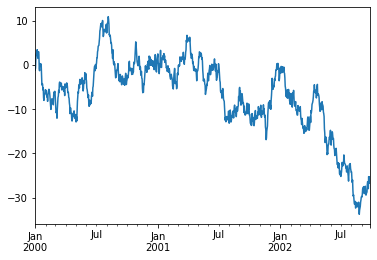

In [ ]:
ts.plot()

On DataFrame, **`plot()`** is a convenience to plot all of the columns with labels:

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-0.795425,-0.185471,0.454159,0.385180
2000-01-02,0.627418,-0.264903,0.083906,1.074475
2000-01-03,-0.422480,1.254343,-0.397912,1.866728
2000-01-04,0.507891,-0.218477,-1.105911,-0.831822
2000-01-05,0.434943,-0.965090,1.498210,-1.094487
...,...,...,...,...
2002-09-22,-1.463031,1.806980,0.699501,0.411307
2002-09-23,0.352909,0.908534,0.289194,-0.610958
2002-09-24,0.981886,-1.068143,0.865880,-1.160376
2002-09-25,0.451210,-0.693798,0.331155,1.144875


In [ ]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.795425,-0.185471,0.454159,0.385180
2000-01-02,-0.168007,-0.450373,0.538064,1.459656
2000-01-03,-0.590486,0.803970,0.140153,3.326384
2000-01-04,-0.082595,0.585493,-0.965759,2.494562
2000-01-05,0.352348,-0.379597,0.532451,1.400075
...,...,...,...,...
2002-09-22,-39.269202,1.606426,-12.253209,0.936818
2002-09-23,-38.916293,2.514960,-11.964014,0.325860
2002-09-24,-37.934407,1.446817,-11.098134,-0.834516
2002-09-25,-37.483197,0.753019,-10.766979,0.310359


<Figure size 432x288 with 0 Axes>

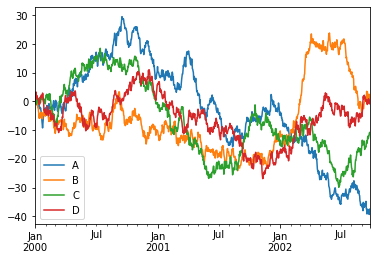

In [ ]:
plt.figure();
df.plot();
plt.legend(loc = 'best')

## Getting Data In/Out
---
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv "Writing to CSV format")

In [ ]:
df.to_csv('foo.csv')

[Reading from a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table "Reading from a csv file")

In [ ]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.483598,0.426364,-0.117650,-0.306856
1,2000-01-02,2.079464,0.207178,-1.478635,-2.985918
2,2000-01-03,2.545530,-1.393445,0.299719,-2.241067
3,2000-01-04,2.270839,-0.593655,0.675529,-2.311171
4,2000-01-05,2.437582,-1.811711,0.227139,-3.210259


### HDF5
Reading and writing to [HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5 "HDF5 (PyTables)").

Writing to a HDF5 Store.

In [ ]:
df.to_hdf('foo.h5', 'df')

### Hierarchical Data Format (HDF) 

  - a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data. 
  - many HDF libraries and associated tools are available under a liberal, BSD-like license for general use
  - HDF5, the current version, simplifies the file structure to include only two major types of object:
    - Datasets: multidimensional arrays of a homogeneous type
    - Groups: container structures which can hold datasets and other groups

Reading from a HDF5 Store.

In [ ]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2000-01-01,-0.795425,-0.185471,0.454159,0.385180
2000-01-02,-0.168007,-0.450373,0.538064,1.459656
2000-01-03,-0.590486,0.803970,0.140153,3.326384
2000-01-04,-0.082595,0.585493,-0.965759,2.494562
2000-01-05,0.352348,-0.379597,0.532451,1.400075


### Excel
Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel "Excel files").

Writing to an excel file.

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file.

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.483598,0.426364,-0.117650,-0.306856
1,2000-01-02,2.079464,0.207178,-1.478635,-2.985918
2,2000-01-03,2.545530,-1.393445,0.299719,-2.241067
3,2000-01-04,2.270839,-0.593655,0.675529,-2.311171
4,2000-01-05,2.437582,-1.811711,0.227139,-3.210259
